In [1]:
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

In [4]:
class ProcessingData:
    
    def __init__(self,filepath):
        with open(filepath, 'rb') as f:
            u = pickle._Unpickler(f)
            u.encoding = 'latin1'
            self.data = u.load()
    '''
    def add_last_temperature_feature(self):
        """Adding a feature which specifies what the previous temperature was "dt" seconds before the current
        datasample. Since data does not need be continious, we need a loop.
        :param: pd.df with cols: "t_in", "dt" and needs to be sorted by time.
        returns pd.df with cols "t_last" added. """

        last_temps = []

        last_temp = None
        curr_time = self.data.index[0]
        for index, row in self.data.iterrows():

            if last_temp is None:
                last_temps.append(row["t_in"])  # so the feature will be zero instead
            else:
                last_temps.append(last_temp)

            if curr_time == index:
                last_temp = row["t_in"]
                curr_time += datetime.timedelta(minutes=row["dt"])
            else:
                last_temp = None
                curr_time = index + datetime.timedelta(minutes=row["dt"])

        self.data["t_last"] = np.array(last_temps)
        return self.data
    '''

    def fix_data(self, interval):
        """Fixes up the data. Makes sure we count two stage as single stage actions, don't count float actions,
        converts action duration and dt to floats, fill's nan's in action_duration and drops all datapoints which
        don't have dt equal to interval.
        :param data:
        :param interval: float:minutes"""
        def f(x):
            if x == 0:
                return 0
            elif x == 2 or x == 5:
                return 2
            elif x ==1 or x == 3:
                return 1

        def h(x):
            if x == 1:
                return 1
            else:
                return 0

        def c(x):
            if x == 2:
                return 1
            else:
                return 0

        self.data["action"] = self.data["action"].map(f)
        self.data['action_heating'] = self.data["action"].map(h)
        self.data['action_cooling'] = self.data['action'].map(c)

        #print self.data.head()

        return self.data[self.data["dt"] == interval]
    
    def filter_data(self):
        self.data = self.data.drop(['t_next', 'dt', 'action', 'previous_action', 'action_duration', \
                                    'zone_temperatureHVAC_Zone_Shelter_Corridor'], axis=1)
        return self.data
    
    def drop_nan(self):
        self.data = self.data.dropna()
        return self.data

In [5]:
training = ProcessingData("../Data/avenal-animal-shelter_training_data.pkl")
training_data = training.fix_data(5)
training_data.head()

,action,action_duration,dt,previous_action,t_next,t_in,t_out,occ,zone_temperatureHVAC_Zone_Shelter_Corridor,action_heating,action_cooling
time,,,,,,,,,,,
2018-04-18 23:16:42+00:00,0,300.0s,5.0,NaN,69.5,69.483333,66.499700,0.0,69.499167,0,0
2018-04-18 23:21:42+00:00,0,600.0s,5.0,NaN,69.5,69.500000,66.499700,0.0,69.485833,0,0
2018-04-18 23:26:42+00:00,0,900.0s,5.0,NaN,69.5,69.500000,66.520546,0.0,69.460833,0,0
2018-04-18 23:31:42+00:00,0,1200.0s,5.0,NaN,69.4,69.500000,66.583083,0.0,69.450000,0,0
2018-04-18 23:36:42+00:00,0,1500.0s,5.0,NaN,69.5,69.400000,66.666466,0.0,69.450489,0,0


In [6]:
training_data['t_in'].corr(training_data['t_next'])

0.99899554815474967

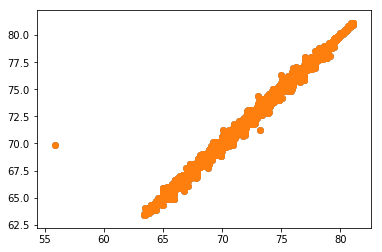

In [8]:
plt.scatter(training_data['t_in'], training_data['t_next'])
plt.show()

In [9]:
training_data['t_out'].corr(training_data['t_next'])

0.6904419112860688

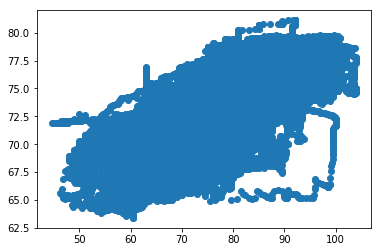

In [10]:
plt.scatter(training_data['t_out'], training_data['t_next'])
plt.show()

In [11]:
training_data['zone_temperatureHVAC_Zone_Shelter_Corridor'].corr(training_data['t_next'])

0.99975743932248262

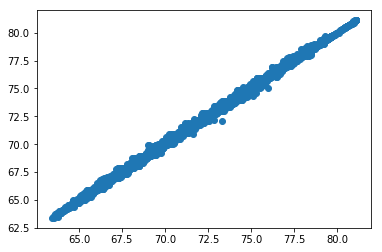

In [12]:
plt.scatter(training_data['zone_temperatureHVAC_Zone_Shelter_Corridor'], training_data['t_next'])
plt.show()